In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.1.0
Eager execution: True


In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: C:\Users\Administrator\.keras\datasets\iris_training.csv


In [6]:
head -n5 {train_dataset_fp}

SyntaxError: invalid syntax (<ipython-input-6-9993dec35824>, line 1)

In [7]:
# CSV文件中列的顺序
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [8]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [9]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [10]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.6, 6.7, 6.3, 5. , 4.9, 6.7, 5. , 4.9, 6.4, 6.2, 6.7, 4.9, 5.1,
       6.2, 5.1, 7.4, 4.9, 7.7, 5.5, 5. , 6.8, 5. , 7.7, 5.6, 5.9, 6.1,
       6.3, 6.1, 4.4, 6.4, 6.3, 4.7], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.1, 3.1, 2.7, 3. , 3.1, 3.3, 2.3, 2.5, 2.8, 3.4, 3. , 3.1, 3.8,
       2.8, 3.5, 2.8, 3.1, 3.8, 2.6, 3.4, 3. , 3.3, 2.6, 2.5, 3.2, 3. ,
       3.4, 2.8, 3. , 3.2, 3.3, 3.2], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 4.4, 4.9, 1.6, 1.5, 5.7, 3.3, 4.5, 5.6, 5.4, 5.2, 1.5, 1.5,
       4.8, 1.4, 6.1, 1.5, 6.7, 4.4, 1.5, 5.5, 1.4, 6.9, 3.9, 4.8, 4.9,
       5.6, 4.7, 1.3, 5.3, 6. , 1.3], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.2, 1.4, 1.8, 0.2, 0.1, 2.1, 1. , 1.7, 2.1, 2.3, 2.3, 0.1, 0.3,
       1.8, 0.3, 1.9, 0.1, 2.2, 1.2, 0.2, 2.1, 0.2, 2.3, 1.1,

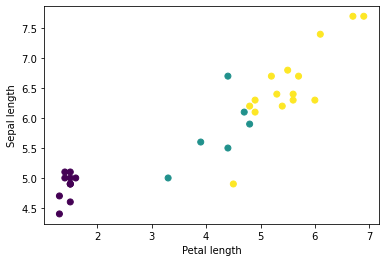

In [11]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [12]:
def pack_features_vector(features, labels):
  """将特征打包到一个数组中"""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [13]:
train_dataset = train_dataset.map(pack_features_vector)

In [14]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.  3.  4.8 1.8]
 [5.4 3.7 1.5 0.2]
 [6.1 2.8 4.  1.3]
 [4.4 2.9 1.4 0.2]
 [5.6 2.5 3.9 1.1]], shape=(5, 4), dtype=float32)


In [15]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # 需要给出输入的形式
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [16]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 1.4365151 , -1.4995239 , -1.9174552 ],
       [ 1.4040822 , -0.38844454, -0.36455768],
       [ 1.5496321 , -1.1152607 , -1.405899  ],
       [ 1.1949891 , -0.333535  , -0.3097361 ],
       [ 1.430388  , -1.1242201 , -1.361422  ]], dtype=float32)>

In [17]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.9191    , 0.04878173, 0.03211826],
       [0.7478852 , 0.12455194, 0.12756291],
       [0.8915375 , 0.06205709, 0.04640542],
       [0.694959  , 0.15070568, 0.15433532],
       [0.8779378 , 0.06823568, 0.05382649]], dtype=float32)>

In [18]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [2 0 1 0 1 2 0 1 2 2 2 1 0 2 1 0 1 0 0 2 2 0 1 2 1 0 1 0 1 2 2 0]


In [19]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [20]:
def loss(model, x, y):
  y_ = model(x)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Loss test: 2.323856830596924


In [21]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [23]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 2.323856830596924
Step: 1,         Loss: 1.949841856956482


In [28]:
## Note: 使用相同的模型变量重新运行此单元

# 保留结果用于绘制
train_loss_results = []
train_accuracy_results = []

num_epochs = 401

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # 优化模型
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # 追踪进度
    epoch_loss_avg(loss_value)  # 添加当前的 batch loss
    # 比较预测标签与真实标签
    epoch_accuracy(y, model(x))

  # 循环结束
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.044, Accuracy: 98.333%
Epoch 050: Loss: 0.071, Accuracy: 96.667%
Epoch 100: Loss: 0.050, Accuracy: 97.500%
Epoch 150: Loss: 0.056, Accuracy: 98.333%
Epoch 200: Loss: 0.042, Accuracy: 99.167%
Epoch 250: Loss: 0.075, Accuracy: 96.667%
Epoch 300: Loss: 0.038, Accuracy: 98.333%
Epoch 350: Loss: 0.035, Accuracy: 98.333%
Epoch 400: Loss: 0.034, Accuracy: 99.167%


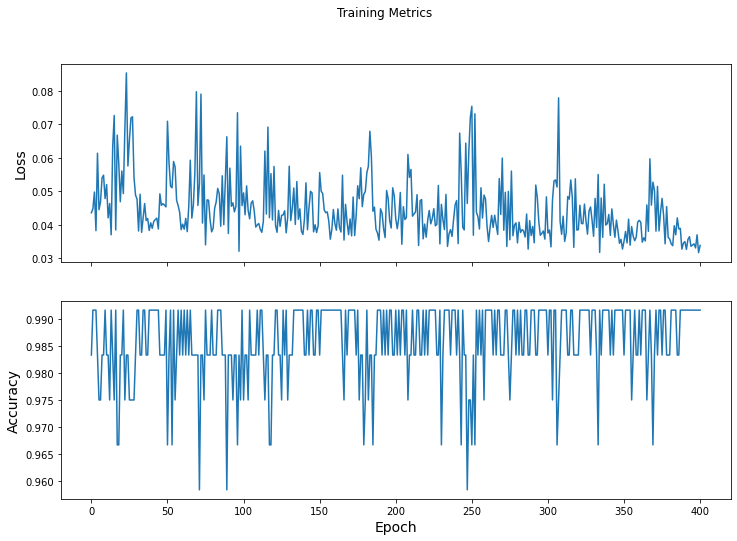

In [29]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [30]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [31]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [32]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [33]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

In [34]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (99.9%)
Example 1 prediction: Iris versicolor (100.0%)
Example 2 prediction: Iris virginica (100.0%)
